In [64]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [81]:
additional_stop_words = ['like', 'said', 'would', 'could', 'should', 'one']
my_stop_words = stop_words.union(additional_stop_words)
print(my_stop_words)

{'most', 'you', 'doesn', 'isn', 'up', 'own', 'ourselves', "you'll", 'being', 'be', 'him', 'there', 'on', "isn't", 'once', 'yourself', 'o', 'he', 'as', 've', 'them', 'until', "won't", 'some', 'then', "wasn't", 'hers', 'am', 'will', 'that', 's', 'from', 'having', 'ours', 'during', 'no', 'had', 'all', 'herself', 'how', "haven't", 'd', 'our', "hasn't", "weren't", "it's", 'aren', 'her', 'over', 'under', 'a', "aren't", "didn't", 'above', 'so', 'theirs', 'these', 'we', 'where', 't', "couldn't", 'm', 'wasn', 'than', 'just', 'an', 'between', 'not', 'for', 'such', 'doing', "needn't", 'can', 'll', 'before', "hadn't", 'below', 'couldn', 'other', "mustn't", 'further', "that'll", 'weren', 'yours', 'myself', 'yourselves', 'whom', "shan't", "you've", 'those', 'more', "mightn't", 'is', 'but', 'your', 'same', 'didn', 'the', "you'd", 'down', 'nor', 'only', 'any', 'what', 'their', 'of', 'too', 'both', 'if', 'while', 'one', 'mightn', 'it', "you're", 'needn', 'off', 'out', 'haven', 'with', 'did', 'shouldn',

In [82]:
# get counts and remove stop words
def vectorizeText(inputText):
#     cv = CountVectorizer(stop_words='english')
    cv = CountVectorizer(stop_words=my_stop_words)
    X = cv.fit_transform(inputText)
    
    print(X.shape)
    print(type(X))
    
    return X, cv

#     df_cv = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())  
#     df_cv.info()
#     print(df_cv.columns)
#     print(df_cv)

# get term frequencies and remove stop words
def vectorizeTextIDF(inputText):
#     cv_tfidf = TfidfVectorizer(stop_words='english')
    cv_tfidf = TfidfVectorizer(stop_words=my_stop_words)
    X_tfidf = cv_tfidf.fit_transform(inputText)
    
    print(X_tfidf.shape)
    print(type(X_tfidf))
    
    return X_tfidf, cv_tfidf
    
#     df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=cv_tfidf.get_feature_names())
#     df_tfidf.info()
#     print(df_tfidf.columns)
#     print(df_tfidf)      



In [8]:
unpickled_df = pd.read_pickle("./sla_chapter_text.pkl")
unpickled_df

,chapter_text,book,chapter
0,prelud stormlight archiv kalak round rocki st...,1,1
1,love men frigid thing mountain stream three s...,1,2
2,kill bastard kill sun still hot die day week ...,1,3
3,ten order love forsaken us almighti shard sou...,1,4
4,man stood watch homeland fall dust water surg...,1,5
...,...,...,...
456,discard help potenti ﬁnal passion el ﬁrst fin...,4,127
457,ye look forward rule human el ﬁrst final ten ...,4,128
458,nearli much look forward serv newest odium re...,4,129
459,fourteen month ago eshonai hit ground chasm f...,4,130


In [83]:
# doc_word, vectorizer = vectorizeText(unpickled_df['chapter_text'])
doc_word, vectorizer = vectorizeTextIDF(unpickled_df['chapter_text'])

(461, 13384)
<class 'scipy.sparse.csr.csr_matrix'>


In [84]:
# non-negative matrix factorization
nmf_model = NMF(3)
doc_topic = nmf_model.fit_transform(doc_word)
doc_topic.shape

(461, 3)

In [85]:
topic_word = nmf_model.components_
topic_word.shape

(3, 13384)

In [86]:
words = vectorizer.get_feature_names()
t = nmf_model.components_.argsort(axis=1)[:,-1:-7:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

[['shallan', 'jasnah', 'adolin', 'veil', 'pattern', 'look'],
 ['kaladin', 'teft', 'syl', 'bridg', 'moash', 'rock'],
 ['dalinar', 'navani', 'adolin', 'venli', 'taravangian', 'sadea']]

In [87]:
# kmeans clustering
k_clusters = 4

km = KMeans(n_clusters=k_clusters, init='k-means++', max_iter=100, n_init=10)
km.fit(doc_word)

order_centroids = km.cluster_centers_.argsort()[:,::-1]

for i in range(k_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :6]:
        print(' %s' % words[ind], end='')
    print()

Cluster 0: kaladin syl teft bridg moash back
Cluster 1: dalinar adolin navani sadea man parshendi
Cluster 2: shallan adolin jasnah veil pattern look
Cluster 3: venli eshonai raboniel szeth navani rhythm


In [88]:
inertias = []
max_k = 30
for k in range(1, max_k):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10)
    clusters = km.fit(doc_word)
    inertias.append(clusters.inertia_)    

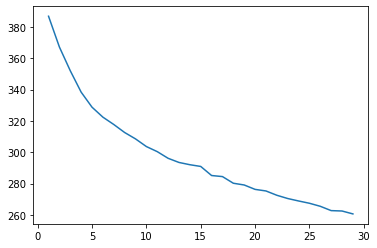

In [89]:
ks = [k for k in range(1,max_k)]
plt.plot(ks, inertias)